

Here's a general description of how to solve this problem. Translating it to Java can still be challenging.

Your input String is basically an infinite sequence of all the natural numbers 1 2 3 4 5 6 7 8 9 10 11 12 13 ....

I believe the point of the exercise is to identify the first sub-sequence of natural numbers of the input String that the substring n belongs to, and then calculate its index without actually constructing the large "infinite" String.

For that purpose, you have to try to split the substring n into an incrementing sequence of numbers having as few digits as possible.

First you have to check is the substring n creates a sequence of single digits numbers. That is the case, for example, if n == 345678 (note that n may contain both single digit and double digit numbers, for example n == 345678910, which you should also be able to identify).

If you fail in that step, you should look for a sequence of double digit numbers. That is the case, for example, if n == 33343536. Now, this could get trickier, since n == 2333435363 is also a sequence of two digit numbers, but the leading and trailing numbers of the sequence (32 and 37) are truncated.

If you fail again, you look for a sequence of 3 digit numbers.

If you don't find any sequence, you treat the entire substring n as a single number in the big String.

Now, suppose n is 199319941995, and you discovered in the previous step that the first number in the sequence is 1993. The remaining work is to calculate the index of the number 1993 in the input String. You know that the single digit numbers take 1*9 indices. The two digit numbers take 2*90 indices. The three digit numbers take 3*900 indices. The 3 digit numbers between 1000 and 1993 take 4*993 indices. Therefore the index of 1993 is 1*9+2*90+3*900+4*993, and that's the first index of the substring 199319941995.


In [113]:
seq = '121122123'

In [ ]:
# known issues:

    # - the condition if counter >= 2 cannot be correct see seq = '12111212', mitigation counld be any condition that half the input string and checks if [:half] is [:half] - 1 

In [211]:
def find_sequence(seq,verbose=False):
    # edge cases
    if len(seq) % 2 == 0:
        fh = seq[:len(seq) // 2]
        sh = seq[len(seq) // 2:]

        if int(sh) == int(fh) + 1:
             print(f'Sequence Found, starting from {int(fh)}') 

    if seq == '12345678910':
        print(f'Sequence Found, starting from 1')
    










    while len(seq) > 0:
        solution = False

        for n in range(1,16):
            seql = [seq[i:i+n] for i in range(0, len(seq), n)]
            counter = 0
            flag = True
            d = {}
            for i in range(0, len(seql) - 1):
                if int(seql[i + 1]) == int(seql[i]) + 1:
                    if verbose:
                        print(True)
                    d[counter] = seql[i]
                    counter += 1
                else:
                    if verbose:
                        print(False)
                    flag = False
            
            if counter >= 2 and flag == True:
                print(f'Sequence Found, starting from {d[0]}')
                solution = True
    
        if solution == True:
            break
        else:
            # print(seq)
            seq = seq[1:]
            
            

    

In [245]:
seq = '9899100'
n = 2

seql = [seq[i:i+n] for i in range(0, len(seq), n)]
counter = 0
d = {}

for i in range(0, len(seql) - 1):
    if int(seql[i + 1]) == int(seql[i]) + 1:

        d[counter] = seql[i]
        counter += 1

    elif len(str(int(seql[i]) + 1)) != len(seql[i]):
        # print(seql[i], str(int(seql[i]) + 1))

        len_i = len(seql[i])

        # print(f'len_i = {len_i}')

        if int(int(seql[i]) + 1) == int(''.join(seql[i+1:i+len_i + 2])):
            # print('yes')
            d[counter] = str(int(seql[i]))
            counter += 1
    
    else:
        break

if counter >= 2:
    print(f'Sequence Found, starting from {d[0]}')
    solution = True

Sequence Found, starting from 98


In [304]:
# I will need this in the helper function to construct the new list with the new step size

def mag_increase(l: list,n: str):
    l2 = ''.join(l[l.index(n)+1:])
    n = int(len(n)) + 1    
    seql = [l2[i:i+n] for i in range(0, len(l2), n)]
    return seql

In [307]:
l = '99100101102'
n = 3
l = [l[i:i+n] for i in range(0, len(l), n)]


print(l)
mag_increase(l, '991')



['991', '001', '011', '02']
00101102
991
4


['0010', '1102']

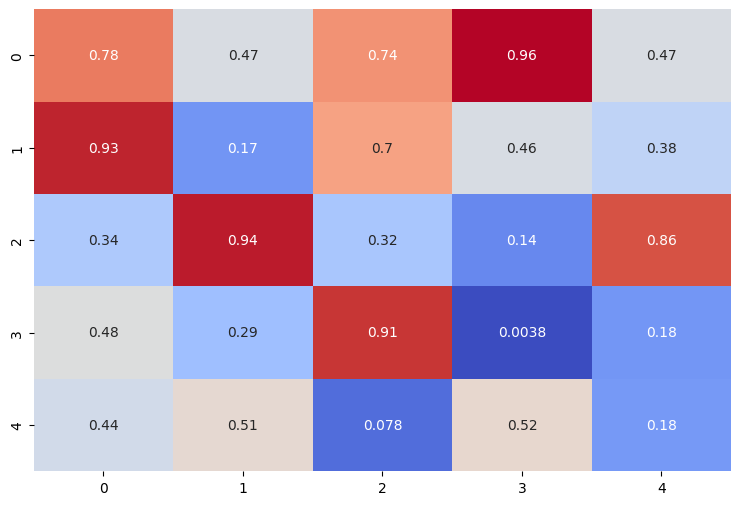

In [167]:
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def display_heatmap(matrix,figsize=(9,6)):
    plt.figure(figsize=figsize)
    ax = sns.heatmap(matrix, annot=True, cmap='coolwarm', cbar=False)
    plt.show()

# Example matrix
matrix = np.random.rand(5, 5)

# Display the matrix as a heatmap with values and a different color scheme
display_heatmap(matrix)


In [147]:
import random
random.choices([0,1,2,3,4,5,6,7,8,9],k=15)
        

[1, 9, 1, 8, 4, 9, 1, 5, 8, 1, 3, 6, 2, 0, 9]

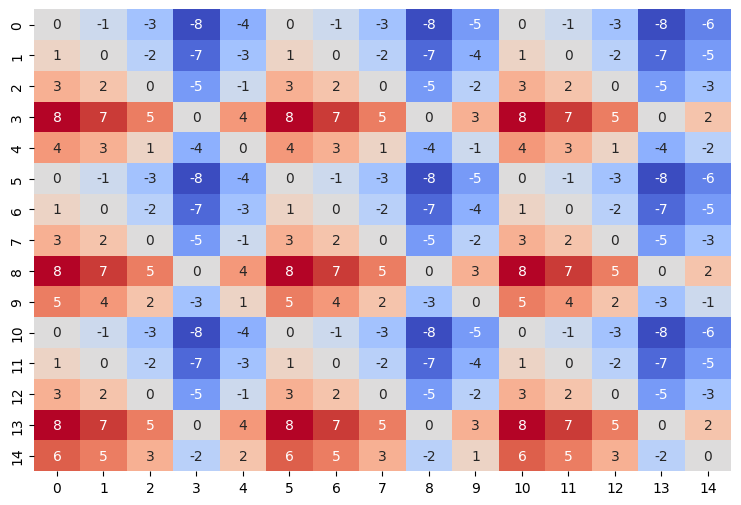

[[1 2 4 9 5 1 2 4 9 6 1 2 4 9 7]]


In [168]:
import random

def create_arr(start,length,randomise=False):
    if randomise:
        l = random.choices([0,1,2,3,4,5,6,7,8,9],k=random.randint(2,15))
        
    else:
        l = [str(x) for x in range(start, start + length + 1)]
        l = ''.join(l)
        l = [int(x) for x in l]

    return len(l), np.array([list(l)],dtype=int).reshape(1,-1)

n, array = create_arr(12495,2,randomise=False)
ones = np.ones(shape=(n,1),dtype=int)

m1 = array.T @ ones.T - ones @ array
m1

display_heatmap(m1)
print(array)